# WeatherPy
----
Observable Trends
- In the northern hemisphere, as you move away from the equator, the temperature decreases. This is seen by the linear regression plot, which has an r-value of -0.66, indicating a moderate/strong negative correlation. 
- In the southern hemisphere, as you get closer to the equator, the temperatures increases. This is seen by the linear regression plot, which has an r-value of 0.77, indicating a moderate/strong positive correlation. 
- The correlation between latitude and temperature isn't perfect, as other factors such as elevation, ocean currents, and precipitation also affect climate patterns.
- Based on the other linear regression plots, there is no correlation (r-value < 0.3) between:
    - Latitude and Humidity %
    - Latitude and Cloudiness %
    - Latitude and Wind Speed

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time # to space out the number of hits
from scipy.stats import linregress
from pprint import pprint 
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputData = "output_data/cities.csv"

# Range of latitudes and longitudes
latRange = (-90, 90)
lngRange = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(latRange[0], latRange[1], size=1500)
lngs = np.random.uniform(lngRange[0], lngRange[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

557

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build base URL and variables
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api_key

In [4]:
# get valid cities
validCities = []

# set records and sets (initialize to 1)
records = 1
sets = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    # Build URL and get Weather Data 
    queryURL = f"{url}appid={api_key}&units={units}&q={city}"
    response = requests.get(queryURL).json()
    
    # append valid cities to the validCities list
    try:
        validCities.append(response['name'])                
        print(f"Processing Record {records} of Set {sets} | {response['name']}")
        
    except:
        print(f"City not found. Skipping...")
        records = records - 1
        
    records = records + 1
    if records > 50:
        records = 1
        sets = sets + 1 
    
    # add a one second interval between queries to stay within API query limits
    time.sleep(1)

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Qaanaaq
Processing Record 2 of Set 1 | Souillac
Processing Record 3 of Set 1 | Ushuaia
Processing Record 4 of Set 1 | Adrar
Processing Record 5 of Set 1 | Yārāda
Processing Record 6 of Set 1 | Busselton
Processing Record 7 of Set 1 | Dikson
Processing Record 8 of Set 1 | Itaituba
Processing Record 9 of Set 1 | Talnakh
Processing Record 10 of Set 1 | Guerrero Negro
Processing Record 11 of Set 1 | Akçakoca
Processing Record 12 of Set 1 | Egvekinot
Processing Record 13 of Set 1 | Khatanga
Processing Record 14 of Set 1 | Lebu
Processing Record 15 of Set 1 | Upernavik
Processing Record 16 of Set 1 | Vila Viçosa
City not found. Skipping...
Processing Record 17 of Set 1 | Lotofaga
City not found. Skipping...
Processing Record 18 of Set 1 | Hirado
Processing Record 19 of Set 1 | Victor Harbor
Processing Record 20 of Set 1 | Mataura
Processing Record 21 of Set 1 | Phang Nga
Processing Record 22 of Set 1 | Kang

Processing Record 34 of Set 4 | Kirundo Province
Processing Record 35 of Set 4 | São João da Barra
Processing Record 36 of Set 4 | Biloela
Processing Record 37 of Set 4 | Esperance
Processing Record 38 of Set 4 | Vuktyl
Processing Record 39 of Set 4 | Santa Cruz de La Palma
Processing Record 40 of Set 4 | Gorlice
Processing Record 41 of Set 4 | Iqaluit
Processing Record 42 of Set 4 | Nara
Processing Record 43 of Set 4 | Sungai Raya
Processing Record 44 of Set 4 | Sept-Îles
Processing Record 45 of Set 4 | Spearfish
Processing Record 46 of Set 4 | Lianran
Processing Record 47 of Set 4 | Westport
Processing Record 48 of Set 4 | Mahébourg
Processing Record 49 of Set 4 | Palmer
Processing Record 50 of Set 4 | General Roca
Processing Record 1 of Set 5 | San Angelo
Processing Record 2 of Set 5 | Nikolskoye
Processing Record 3 of Set 5 | Mahon
Processing Record 4 of Set 5 | Yumen
Processing Record 5 of Set 5 | Kaitangata
Processing Record 6 of Set 5 | Wakkanai
Processing Record 7 of Set 5 | Ca

Processing Record 22 of Set 8 | Maltahöhe
Processing Record 23 of Set 8 | Atambua
Processing Record 24 of Set 8 | Buford
Processing Record 25 of Set 8 | Kailua
Processing Record 26 of Set 8 | Longyan
Processing Record 27 of Set 8 | Mayo
Processing Record 28 of Set 8 | Caranavi
Processing Record 29 of Set 8 | Leninsk
City not found. Skipping...
City not found. Skipping...
Processing Record 30 of Set 8 | Cururupu
Processing Record 31 of Set 8 | Port-Gentil
Processing Record 32 of Set 8 | Nobres
Processing Record 33 of Set 8 | Shubarkuduk
Processing Record 34 of Set 8 | Nimāparha
City not found. Skipping...
Processing Record 35 of Set 8 | Tuatapere
Processing Record 36 of Set 8 | Marystown
Processing Record 37 of Set 8 | Mkushi
Processing Record 38 of Set 8 | Kerema
Processing Record 39 of Set 8 | Karasjok
Processing Record 40 of Set 8 | Cayenne
Processing Record 41 of Set 8 | Erdenet
Processing Record 42 of Set 8 | Salisbury
Processing Record 43 of Set 8 | Poum
Processing Record 44 of Se

In [5]:
len(validCities)

508

In [6]:
# Empty lists 
latitudes = []
longitudes = []
maxTemps = []
humidity = []
cloudiness = []
windSpeed = []
country = []
date = []

# loop through the cities and grab the information needed for the lists
for city in validCities:
    queryURL = f"{url}appid={api_key}&units={units}&q={city}"
    # Get weather data
    response = requests.get(queryURL).json()
   
    #add the info to the lists
    latitudes.append(response["coord"]["lat"])
    longitudes.append(response["coord"]["lon"])
    maxTemps.append(response["main"]["temp_max"])
    humidity.append(response["main"]["humidity"])
    cloudiness.append(response['clouds']['all'])
    windSpeed.append(response["wind"]["speed"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weatherDictionary = {
    "City": validCities,
    "Lat": latitudes,
    "Lng": longitudes,
    "Max Temp": maxTemps,
    "Humidity": humidity, 
    "Cloudiness": cloudiness,
    "Wind Speed": windSpeed,
    "Country": country, 
    "Date": date
}

weatherDF = pd.DataFrame(weatherDictionary)
weatherDF.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,40.55,92,100,0.38,GL,1658709538
1,Souillac,-20.5167,57.5167,66.60,84,38,7.07,MU,1658709538
2,Ushuaia,-54.8000,-68.3000,35.26,64,40,5.75,AR,1658709528
3,Adrar,20.5022,-10.0711,95.61,7,5,10.13,MR,1658709539
4,Yārāda,17.6500,83.2667,77.32,100,40,2.30,IN,1658709539


In [8]:
weatherDF.to_csv("outputData/WeatherData.csv", index=False)

In [9]:
weatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,5.080000e+02
mean,21.150910,21.511625,69.373346,73.521654,54.625984,7.363248,1.658709e+09
std,33.678352,92.157883,14.178368,19.286011,40.454444,5.168524,2.144215e+02
min,-54.800000,-179.166700,26.650000,1.000000,0.000000,0.000000,1.658709e+09
25%,-7.228475,-57.568125,59.065000,64.000000,10.750000,3.440000,1.658709e+09
50%,25.912350,24.908950,71.405000,77.000000,59.500000,5.750000,1.658709e+09
75%,49.899550,106.259725,79.852500,88.000000,99.250000,10.417500,1.658710e+09
max,78.218600,179.316700,106.320000,100.000000,100.000000,27.290000,1.658710e+09


Based on the data above, no cities have humidity over 100 (skip step)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

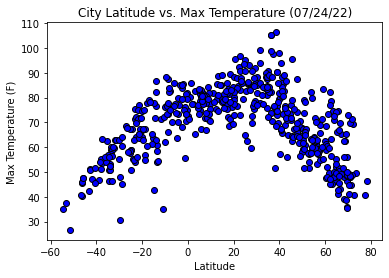

In [10]:
# create scatter plot
plt.scatter(weatherDF["Lat"], weatherDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("outputData/Latitude vs Max Temperature.png")
plt.show()

Plotting the relationship between the latitude and the max temperature of each city.

## Latitude vs. Humidity Plot

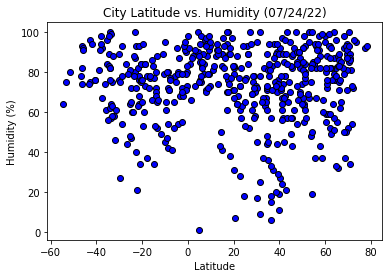

In [11]:
# create scatter plot
plt.scatter(weatherDF["Lat"], weatherDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("outputData/Latitude vs Humidity.png")
plt.show()

Plotting the relationship between the latitude and the % of humidity of each city.

## Latitude vs. Cloudiness Plot

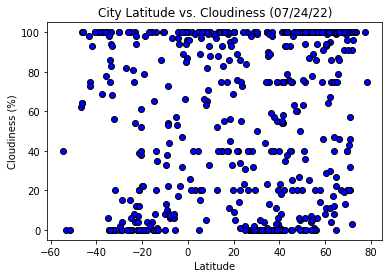

In [12]:
# create scatter plot
plt.scatter(weatherDF["Lat"], weatherDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("outputData/Latitude vs Cloudiness.png")
plt.show()

Plotting the relationship between the latitude and the % of cloudiness of each city.

## Latitude vs. Wind Speed Plot

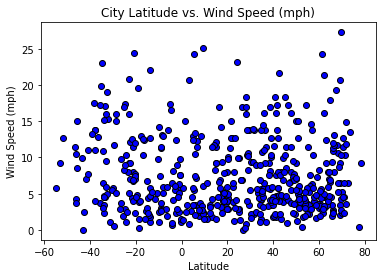

In [13]:
# create scatter plot
plt.scatter(weatherDF["Lat"], weatherDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("outputData/Latitude vs Wind Speed.png")
plt.show()

Plotting the relationship between the latitude and the wind speed (mph) of each city.

## Linear Regression

In [14]:
# Create a DF for the northern and southern hemisphere based on latitude
northernDF = weatherDF[weatherDF["Lat"] >= 0]
southernDF = weatherDF[weatherDF["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.6603022073827371


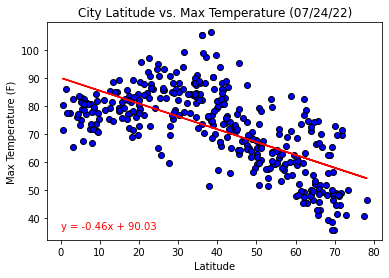

In [15]:
# Create scatter plot
plt.scatter(northernDF["Lat"], northernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("outputData/Max Temp vs Latitude Regression - NH")

# Create and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"],northernDF["Max Temp"])
regressValues = (northernDF["Lat"]*slope) + intercept
lineEQ = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(northernDF["Lat"], regressValues, "r-")
plt.annotate(lineEQ,(0,36), fontsize=10, color="red")
print(f"The r-value is {rvalue}")
plt.show()

The r-value of -0.66 indicates a negative moderate/strong correlation. In the northern hemisphere, as you move away from the equator, the temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7703519201392166


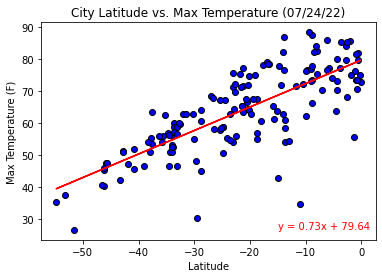

In [25]:
# Create scatter plot
plt.scatter(southernDF["Lat"], southernDF["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("outputData/Max Temp vs Latitude Regression - SH")

# Create and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"],southernDF["Max Temp"])
regressValues = (southernDF["Lat"]*slope) + intercept
lineEQ = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(southernDF["Lat"], regressValues, "r-")
plt.annotate(lineEQ,(-15,27), fontsize=10, color="red")
print(f"The r-value is {rvalue}")
plt.show()

The r-value of 0.77 indicates a positive strong correlation. In the southern hemisphere, as you move closer to the equator, the temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.007318746726820299


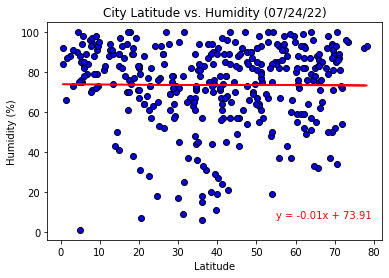

In [17]:
# Create scatter plot
plt.scatter(northernDF["Lat"], northernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("outputData/Humidity vs Latitude Regression - NH")

# Create and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"],northernDF["Humidity"])
regressValues = (northernDF["Lat"]*slope) + intercept
lineEQ = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(northernDF["Lat"], regressValues, "r-")
plt.annotate(lineEQ,(55,7), fontsize=10, color="red")
print(f"The r-value is {rvalue}")
plt.show()

The very low r-value indicates that there is no correlation between the latitude of a city and the percentage of humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.11545812528090023


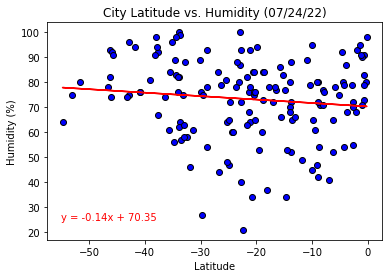

In [18]:
# Create scatter plot
plt.scatter(southernDF["Lat"], southernDF["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Humidity (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("outputData/Humidity vs Latitude Regression - SH")

# Create and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"],southernDF["Humidity"])
regressValues = (southernDF["Lat"]*slope) + intercept
lineEQ = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(southernDF["Lat"], regressValues, "r-")
plt.annotate(lineEQ,(-55,25), fontsize=10, color="red")
print(f"The r-value is {rvalue}")
plt.show()

The very low r-value indicates that there is no correlation between the latitude of a city and the percentage of humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.024551912685917582


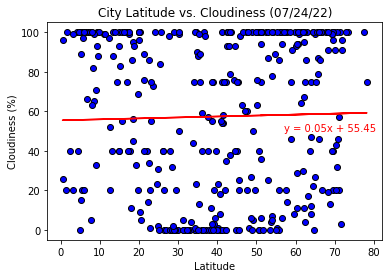

In [26]:
# Create scatter plot
plt.scatter(northernDF["Lat"], northernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("outputData/Cloudiness vs Latitude Regression - NH")

# Create and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"],northernDF["Cloudiness"])
regressValues = (northernDF["Lat"]*slope) + intercept
lineEQ = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(northernDF["Lat"], regressValues, "r-")
plt.annotate(lineEQ,(57,50), fontsize=10, color="red")
print(f"The r-value is {rvalue}")
plt.show()

The very low r-value indicates that there is no correlation between the latitude of a city and the percentage of cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.04121194315272629


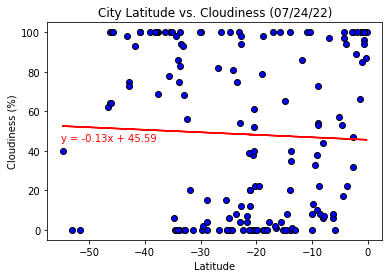

In [27]:
# Create scatter plot
plt.scatter(southernDF["Lat"], southernDF["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("outputData/Cloudiness vs Latitude Regression - SH")

# Create and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"],southernDF["Cloudiness"])
regressValues = (southernDF["Lat"]*slope) + intercept
lineEQ = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(southernDF["Lat"], regressValues, "r-")
plt.annotate(lineEQ,(-55,45), fontsize=10, color="red")
print(f"The r-value is {rvalue}")
plt.show()

The very low r-value indicates that there is no correlation between the latitude of a city and the percentage of cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.025652286084243543


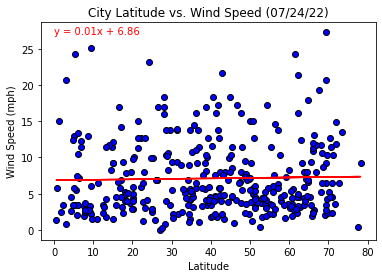

In [30]:
# Create scatter plot
plt.scatter(northernDF["Lat"], northernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("outputData/Wind Speed vs Latitude Regression - NH")

# Create and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northernDF["Lat"],northernDF["Wind Speed"])
regressValues = (northernDF["Lat"]*slope) + intercept
lineEQ = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(northernDF["Lat"], regressValues, "r-")
plt.annotate(lineEQ,(0,27), fontsize=10, color="red")
print(f"The r-value is {rvalue}")
plt.show()

The very low r-value indicates that there is no correlation between the latitude of a city and the speed of the wind.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.20932871450419982


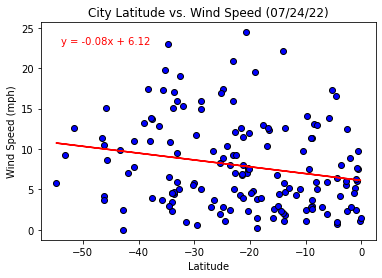

In [32]:
# Create scatter plot
plt.scatter(southernDF["Lat"], southernDF["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (07/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("outputData/Wind Speed vs Latitude Regression - SH")

# Create and plot linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southernDF["Lat"],southernDF["Wind Speed"])
regressValues = (southernDF["Lat"]*slope) + intercept
lineEQ = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(southernDF["Lat"], regressValues, "r-")
plt.annotate(lineEQ,(-54,23), fontsize=10, color="red")
print(f"The r-value is {rvalue}")
plt.show()

The very low r-value indicates that there is no correlation between the latitude of a city and the speed of the wind.